In [2218]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2219]:
!pip install xgboost

In [2220]:
df=pd.read_csv('kidney_disease.csv')

In [2221]:
df.shape

(400, 26)

In [2222]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [2223]:
df['classification'].value_counts() #apply smote for oversampling as data is imbalanced

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [2224]:
pd.set_option('display.max_columns',None)

In [2225]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [2226]:
df.drop('id',axis=1, inplace=True)

In [2227]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [2228]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [2229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [2230]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [2231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [2232]:
df.isna().sum() #null values 

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [2233]:
for i in df.columns:                      #will be handled in data preparation by filling it with mean or median
    percentage=(df.isna().sum()/len(df))*100
print(percentage)

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
class                       0.00
dtype: float64


In [2234]:
numeric_cols = df.select_dtypes(include='float').columns


In [2235]:
cat_cols= df.select_dtypes(include='object').columns

In [2236]:
numeric_cols

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [2237]:
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

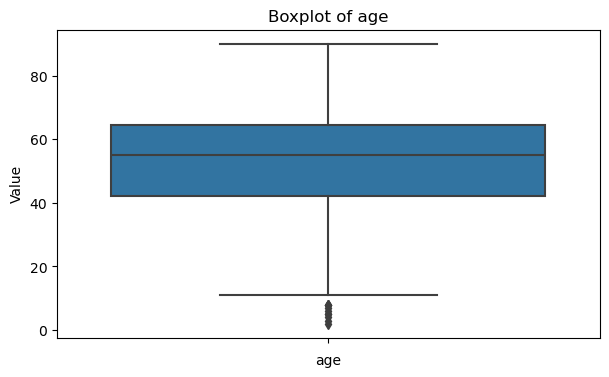

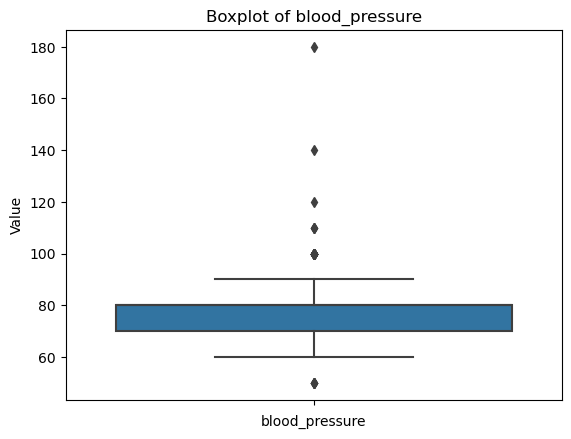

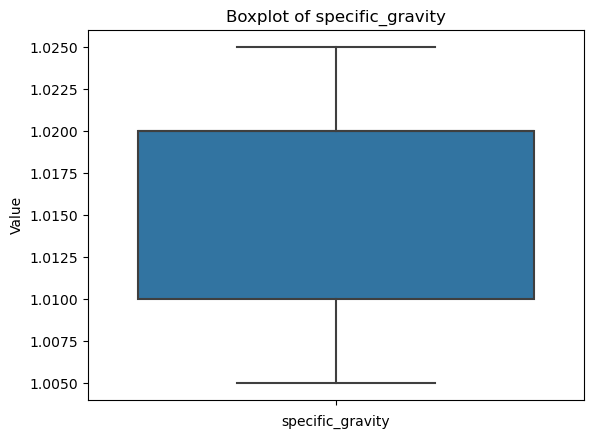

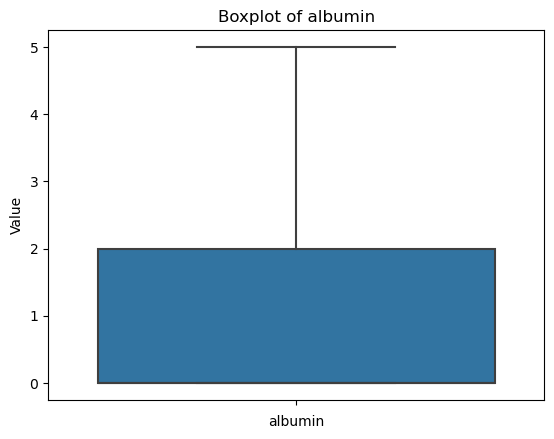

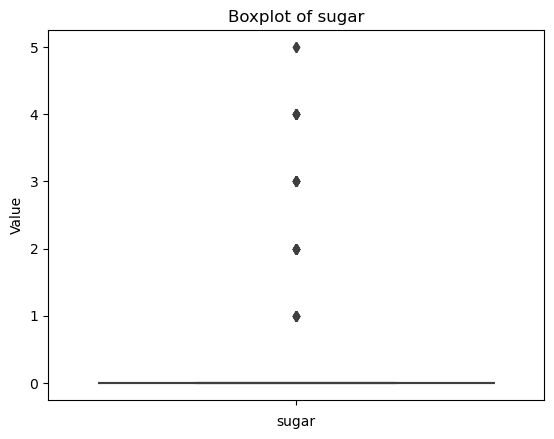

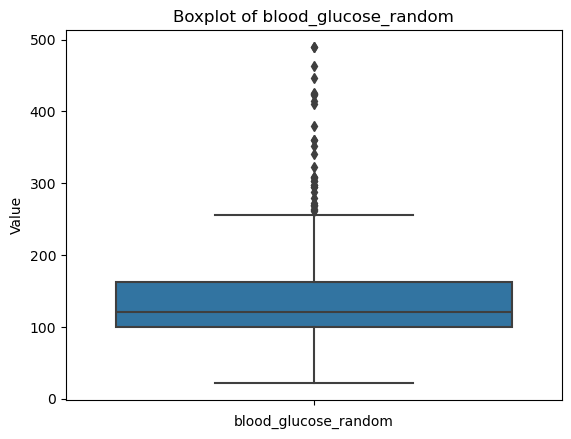

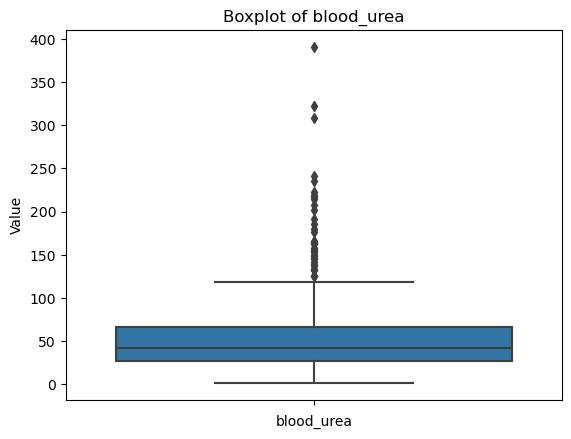

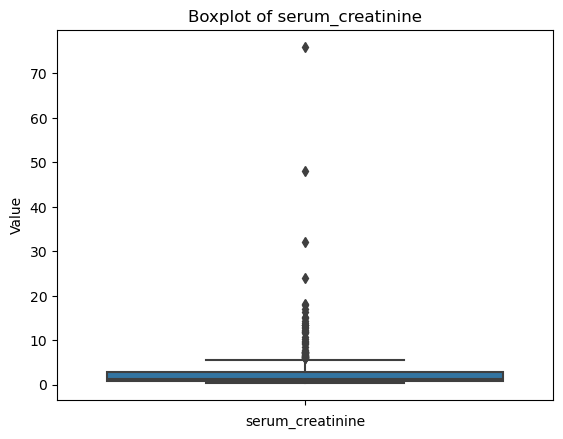

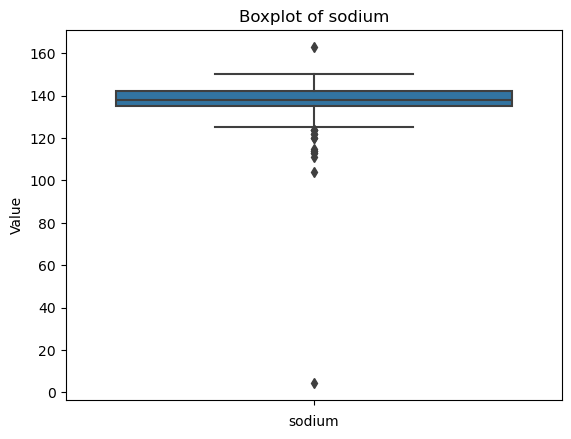

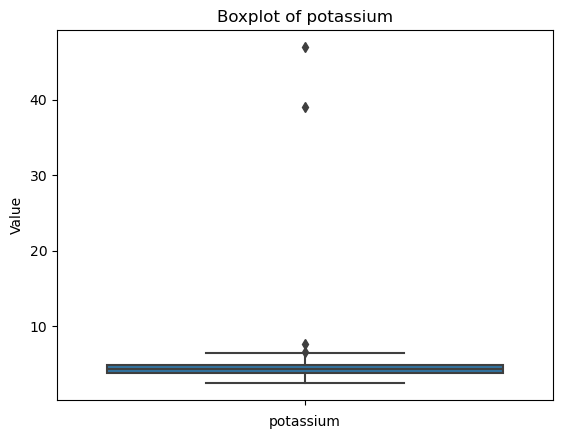

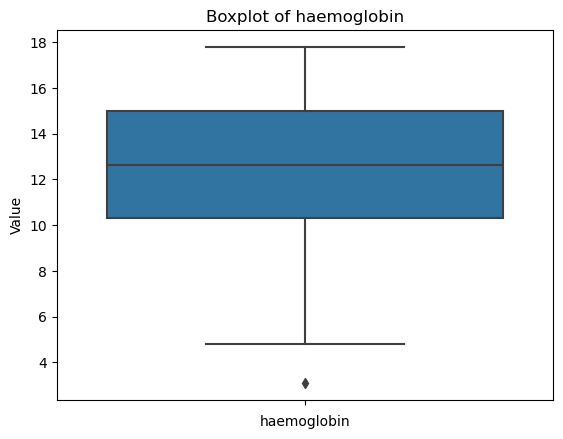

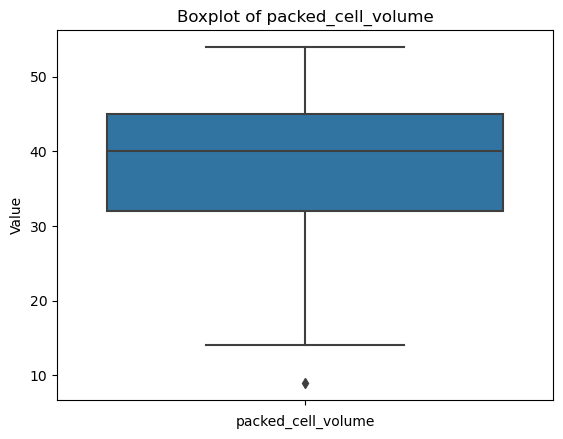

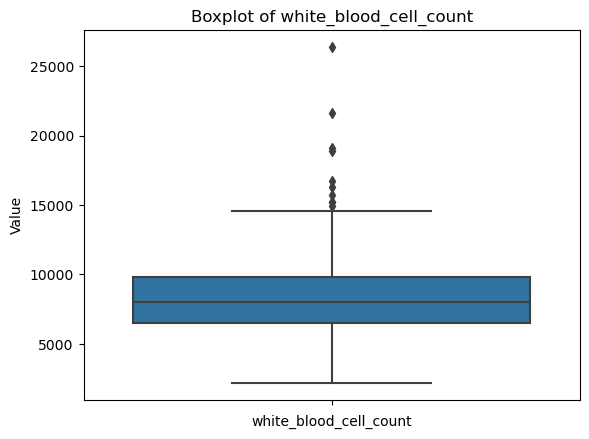

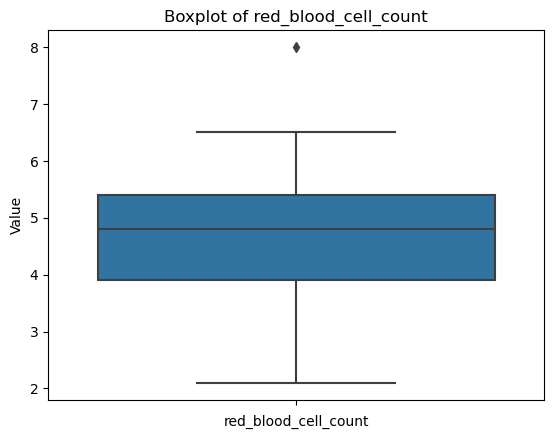

In [2238]:
plt.figure(figsize=(7, 4))  # Adjust figure size if needed

for col in numeric_cols:
    sns.boxplot(data=df, y=col, orient='v')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.xlabel(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

In [2239]:
#above plots show where outliers exists

In [2240]:
#outliers will be handled in data preparation through iqr method

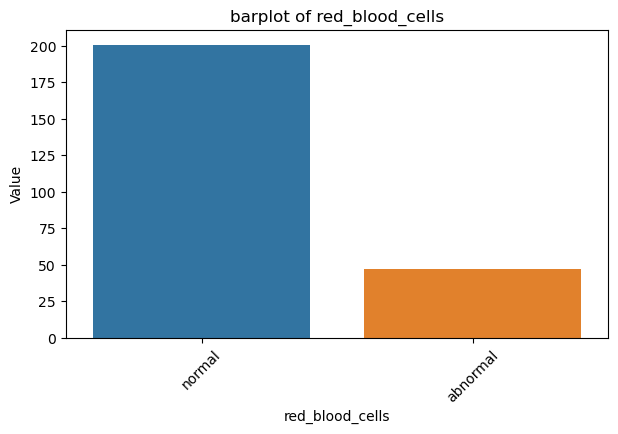

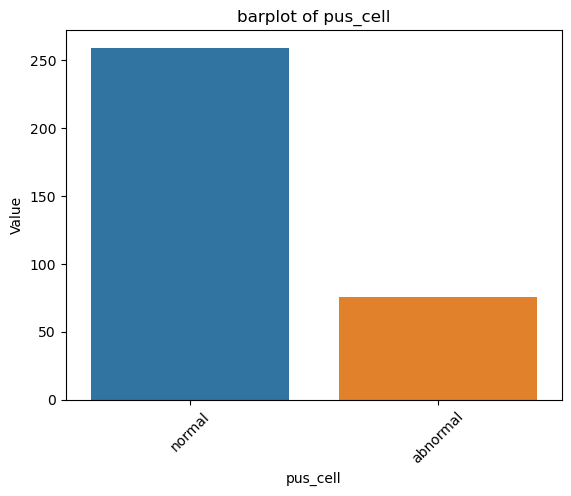

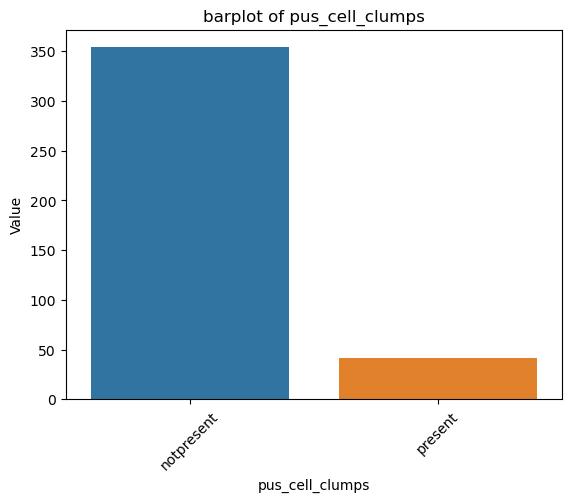

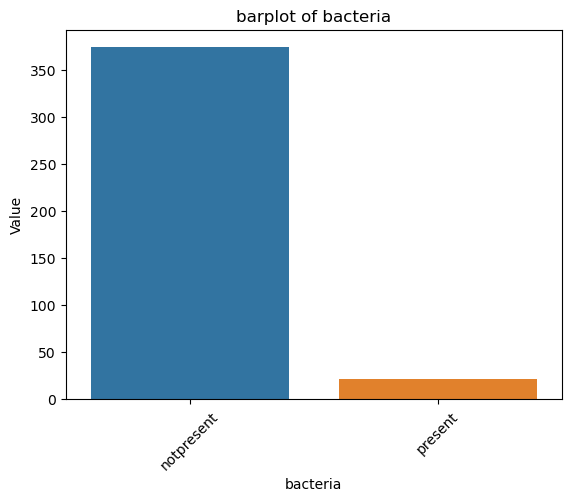

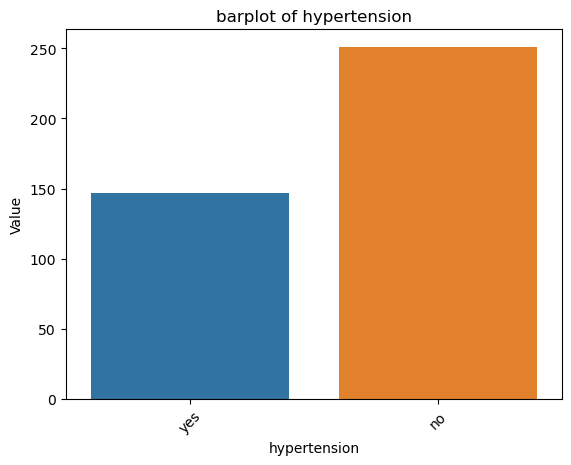

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


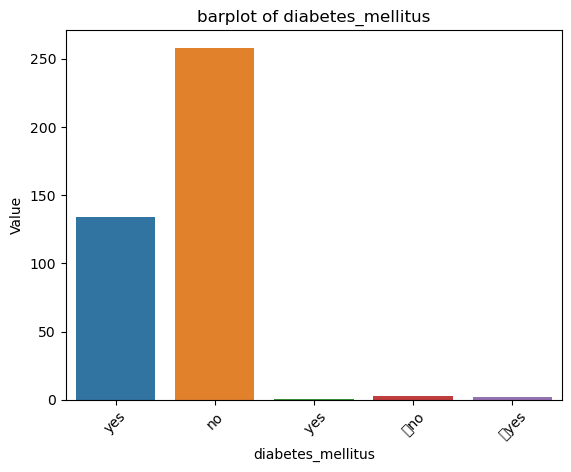

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


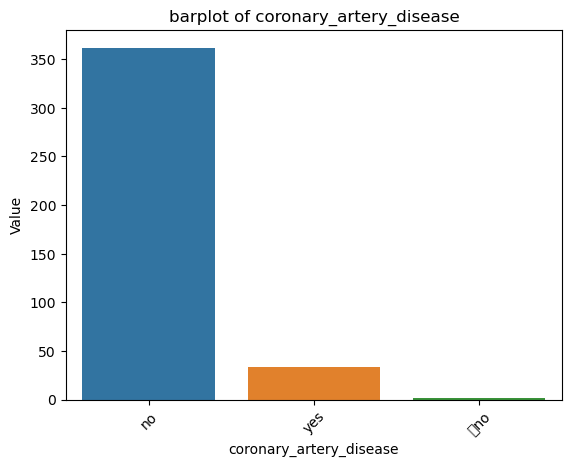

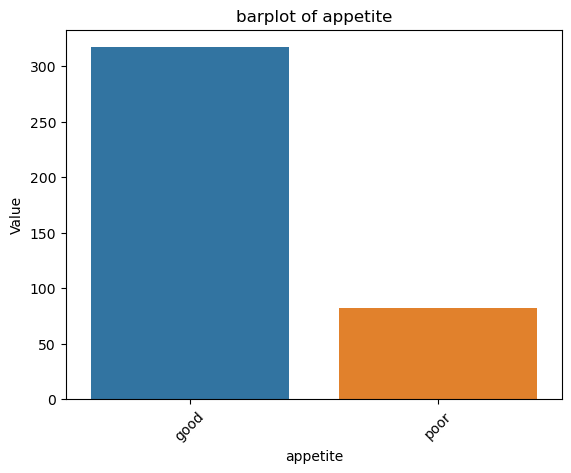

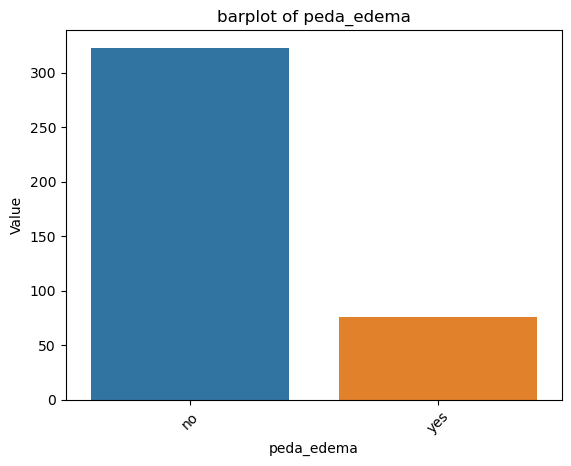

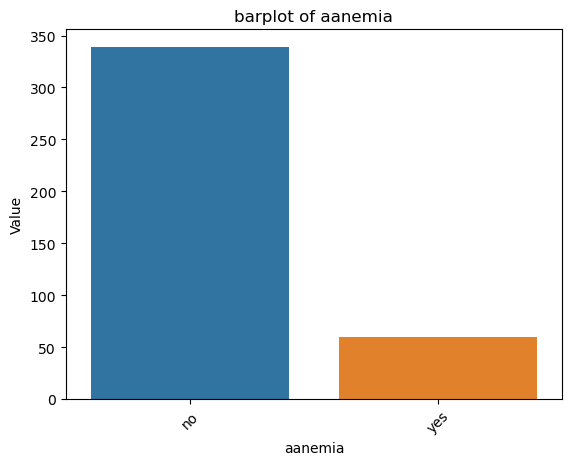

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


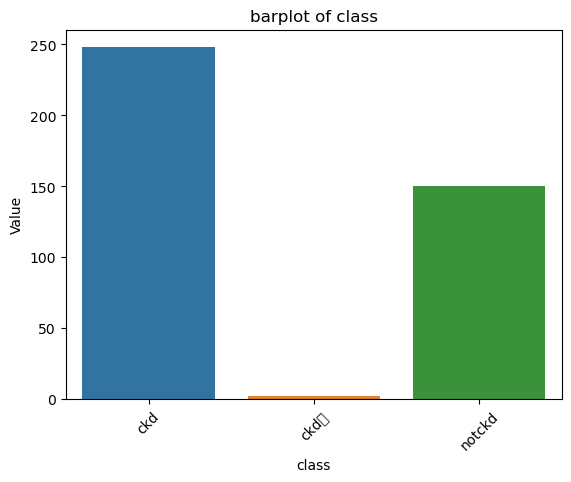

In [2241]:
plt.figure(figsize=(7, 4))  # Adjust figure size if needed

for col in cat_cols:
    sns.countplot(x= col, data = df,orient='h')
    plt.title(f'barplot of {col}')
    plt.ylabel('Value')
    plt.xlabel(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

In [2242]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [2243]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2244]:
#which age people have the most sugar level?

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

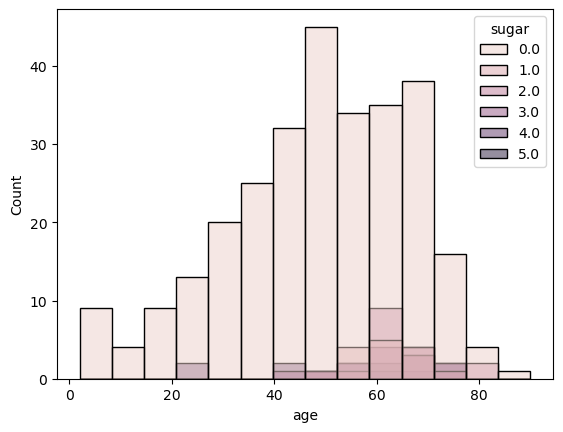

In [2245]:
sns.histplot(data=df,x=df['age'],hue='sugar')

Between age of 40 to 80 high sugar is seen in these people

In [2246]:
#which age people has the most blood pressure level

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

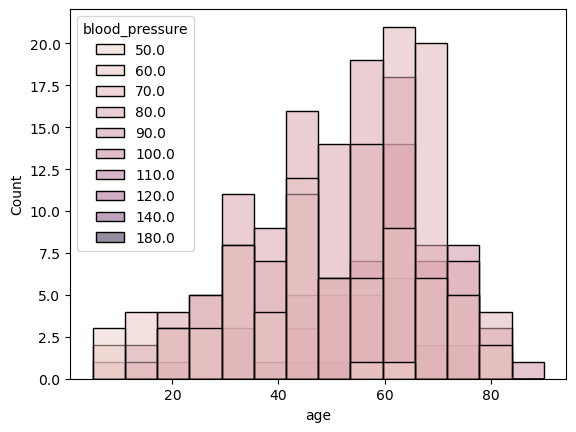

In [2247]:
sns.histplot(data=df,x=df['age'],hue='blood_pressure')

In [2248]:
#haemoglobin level

<Axes: xlabel='age', ylabel='haemoglobin'>

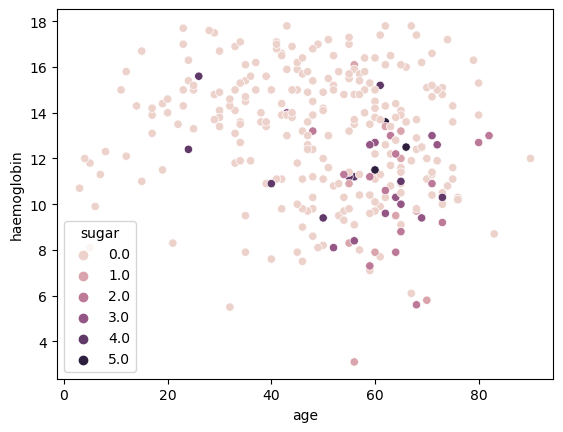

In [2249]:
sns.scatterplot(data=df,x=df['age'],y=df['haemoglobin'],hue=df['sugar'])

haemoglobin level is observed mostly leass than 12 and high sugar levels between the ages of 40-80

In [2250]:
#anemia with respect to hemoglobin levels in different ages

<Axes: xlabel='age', ylabel='haemoglobin'>

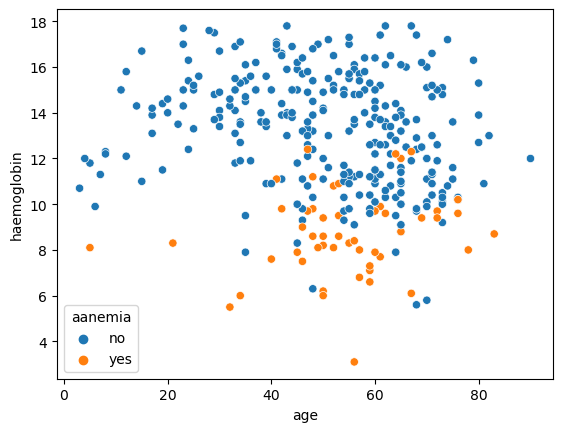

In [2251]:
sns.scatterplot(data=df,x=df['age'],y=df['haemoglobin'],hue=df['aanemia'])

aanemia: Anemia is a condition where there is a deficiency of red blood cells or hemoglobin, affecting oxygen delivery to tissues.haemoglobin level less than 12 are mostly prone to aanemia

<Axes: xlabel='age', ylabel='sugar'>

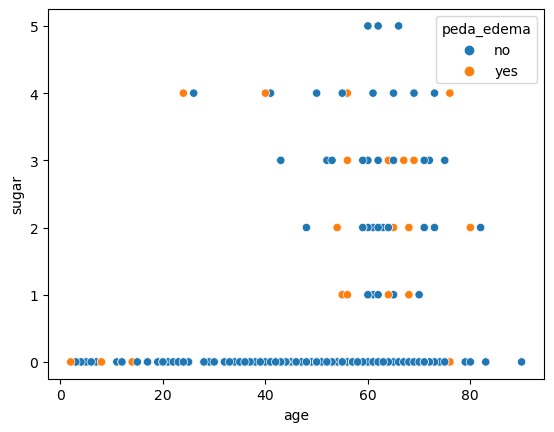

In [2252]:
sns.scatterplot(data=df,x=df['age'],y=df['sugar'],hue=df['peda_edema'])

Edema (swelling) in the legs and feet may indicate fluid retention, heart failure, kidney disease, or liver disease.Mostly observed between the ages of 40-80

<Axes: xlabel='age', ylabel='appetite'>

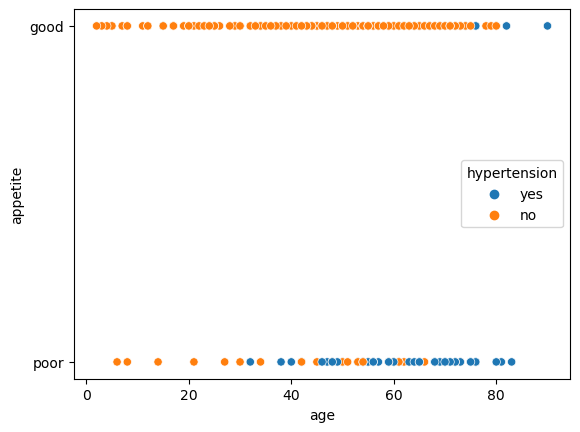

In [2253]:
sns.scatterplot(data=df,x=df['age'],y=df['appetite'],hue='hypertension')

Changes in appetite can be caused by various factors, including metabolic disorders (like hyperthyroidism or hypothyroidism), emotional or psychological factors (like stress or depression), medications, and certain medical conditions affecting the digestive system or hormones.Hypertension mostly observed in poor appetitite people between the ages of 40-80

<Axes: xlabel='age', ylabel='blood_pressure'>

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


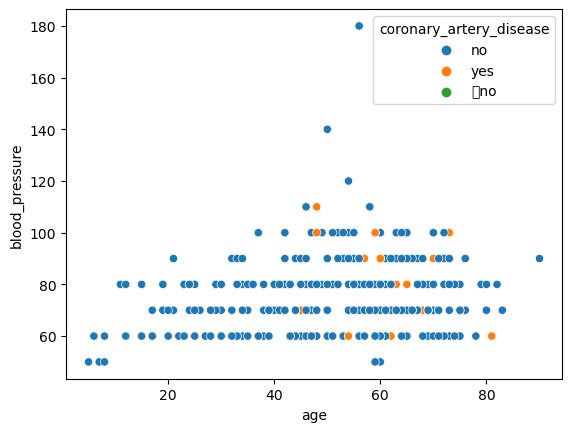

In [2254]:
sns.scatterplot(data=df,x=df['age'],y=df['blood_pressure'],hue='coronary_artery_disease')

Coronary artery disease (CAD) is primarily caused by atherosclerosis, where plaque buildup narrows and hardens coronary arteries, reducing blood flow to the heart. Risk factors include high blood pressure, high cholesterol, smoking, diabetes, and obesity.Mostly observed with blood pressure less than 120 between the ages of 40-80

<Axes: xlabel='age', ylabel='sodium'>

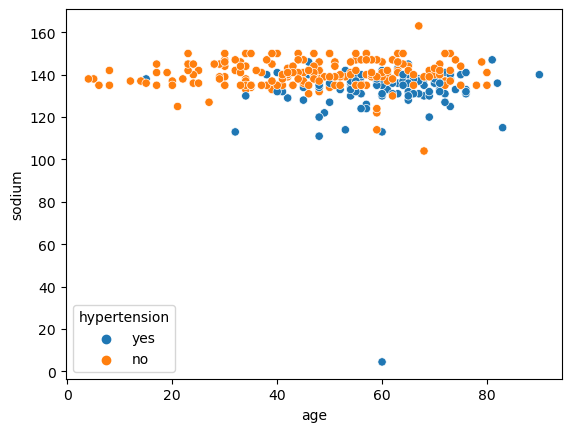

In [2255]:
sns.scatterplot(data=df,x=df['age'],y=df['sodium'],hue='hypertension')

Hypertension observed between 30 to 80 ages of people with sodium levels between 100-140.

<Axes: xlabel='age', ylabel='red_blood_cell_count'>

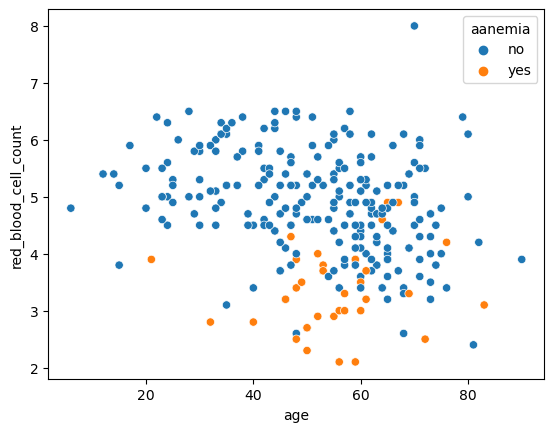

In [2256]:
sns.scatterplot(data=df,x=df['age'],y=df['red_blood_cell_count'],hue=df['aanemia'])

Abnormal red blood cell counts can be caused by anemia (low RBC count), polycythemia (high RBC count), nutritional deficiencies, chronic diseases, bone marrow disorders, or genetic conditions affecting red blood cell production.Aanemia observed between 30-80  with red blood cell count less than 5

<Axes: xlabel='age', ylabel='white_blood_cell_count'>

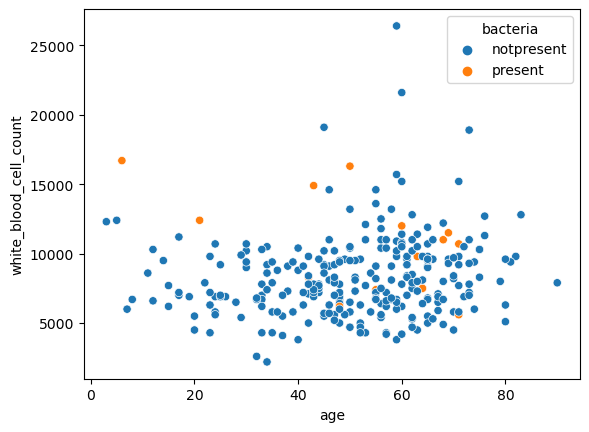

In [2257]:
sns.scatterplot(data=df,x=df['age'],y=df['white_blood_cell_count'],hue=df['bacteria'])

 Elevated white blood cell counts (leukocytosis) are typically caused by infections (bacterial, viral, or fungal), inflammation, autoimmune disorders, leukemia, or medications that stimulate white blood cell production.Bacteria present in all ages of people with white blood cell count more than 5000.


<Axes: xlabel='age', ylabel='packed_cell_volume'>

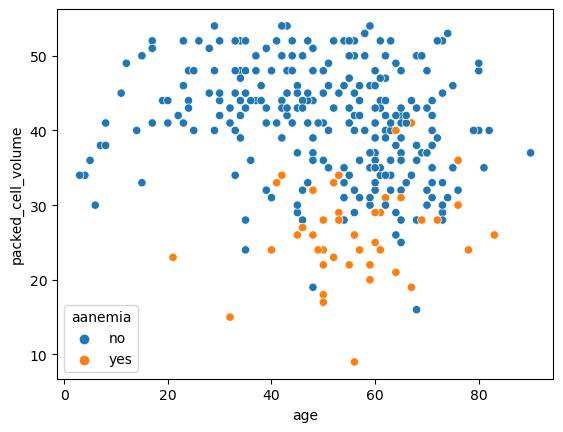

In [2258]:
sns.scatterplot(data=df,x=df['age'],y=df['packed_cell_volume'],hue=df['aanemia'])

Abnormal hematocrit levels can indicate anemia (low hematocrit) due to iron deficiency or other causes, or dehydration (high hematocrit).Aanemia observed in people mostly of 40-80 ages with packed cell volume less than 40.

<Axes: xlabel='age', ylabel='sugar'>

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


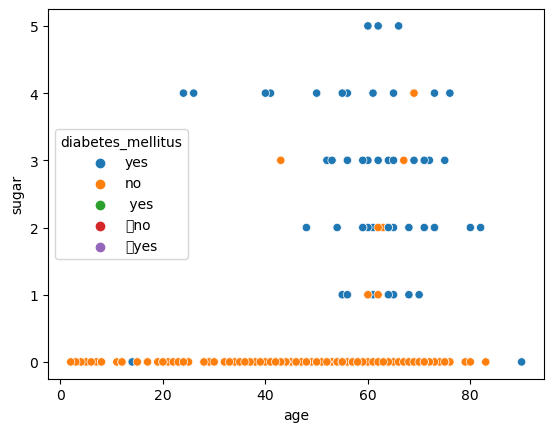

In [2259]:
sns.scatterplot(data=df,x=df['age'],y=df['sugar'],hue=df['diabetes_mellitus'])

Type 1 diabetes is caused by autoimmune destruction of insulin-producing cells in the pancreas, while type 2 diabetes is primarily caused by insulin resistance (often related to obesity, sedentary lifestyle, and genetic factors).Diabetes mellitus obsereved in people of ages between 40-80

<Axes: xlabel='age', ylabel='haemoglobin'>

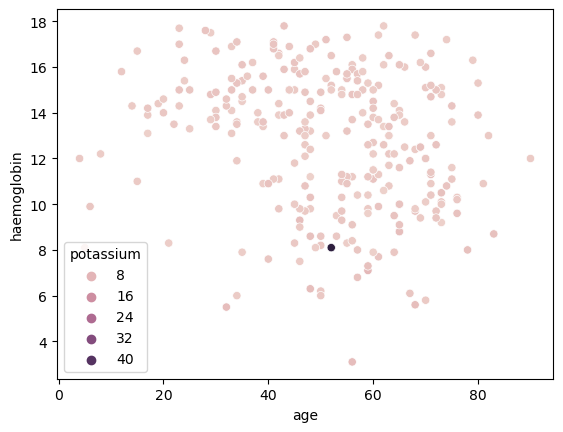

In [2260]:
sns.scatterplot(data=df,x=df['age'],y=df['haemoglobin'],hue=df['potassium'])

High potassium person with haemoglobin 8 observed between age of 40-60

<Axes: xlabel='age', ylabel='serum_creatinine'>

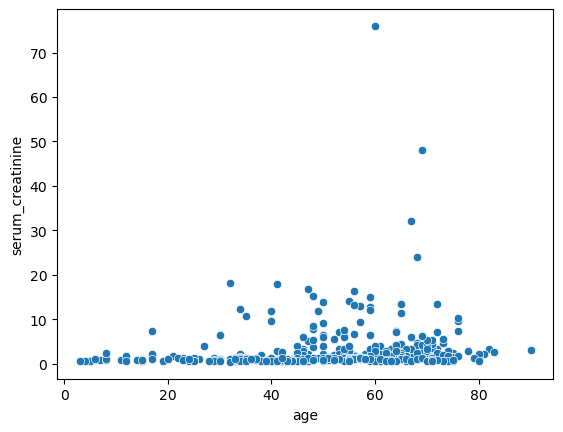

In [2261]:
sns.scatterplot(data=df,x=df['age'],y=df['serum_creatinine'])

Elevated serum creatinine levels indicate impaired kidney function or kidney disease, dehydration, muscle breakdown (rhabdomyolysis), certain medications (like NSAIDs), and urinary tract obstruction.
observed mostly between ages of 40-80

<Axes: xlabel='age', ylabel='blood_urea'>

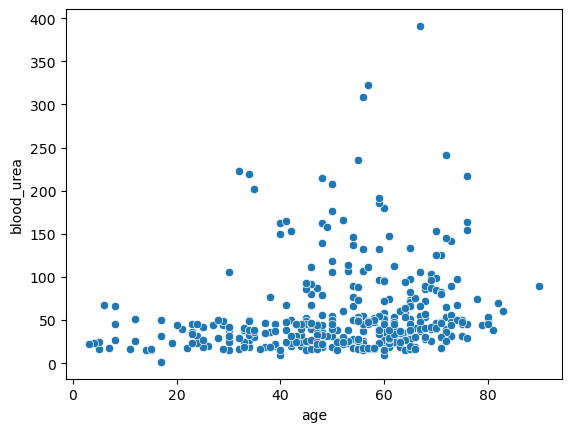

In [2262]:
sns.scatterplot(data=df,x=df['age'],y=df['blood_urea'])

Elevated blood urea nitrogen (BUN) levels can be caused by kidney dysfunction or failure, dehydration, high protein intake, certain medications (like steroids), and gastrointestinal bleeding
Observed between the ages of 40-80.


<Axes: xlabel='age', ylabel='sugar'>

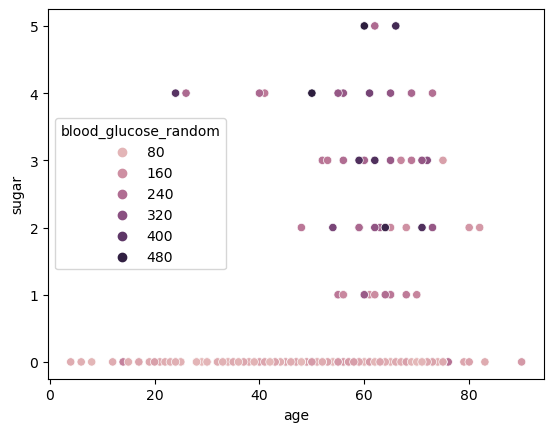

In [2263]:
sns.scatterplot(data=df,x=df['age'],y=df['sugar'],hue=df['blood_glucose_random'])

High blood glocose random are mostly prone to high sugar levels.

<Axes: xlabel='age', ylabel='bacteria'>

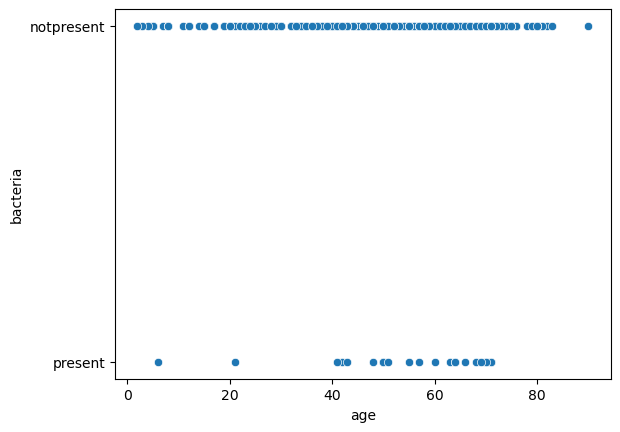

In [2264]:
sns.scatterplot(data=df,x=df['age'],y=df['bacteria'])

Bacteria mostly present between 40-80 age of people

<Axes: xlabel='age', ylabel='pus_cell'>

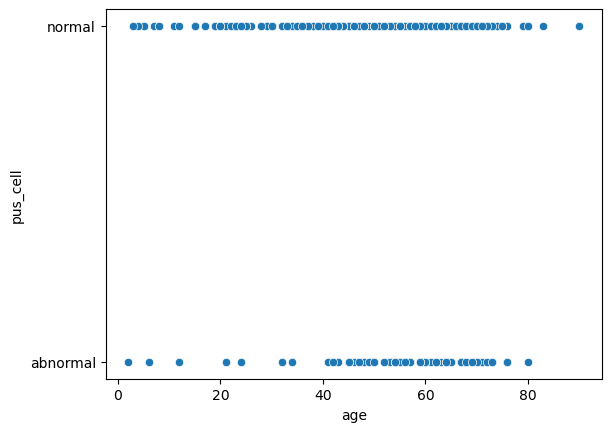

In [2265]:
sns.scatterplot(data=df,x=df['age'],y=df['pus_cell'])

abnormal pus cell observed between the ages of 40-80

<Axes: xlabel='age', ylabel='red_blood_cells'>

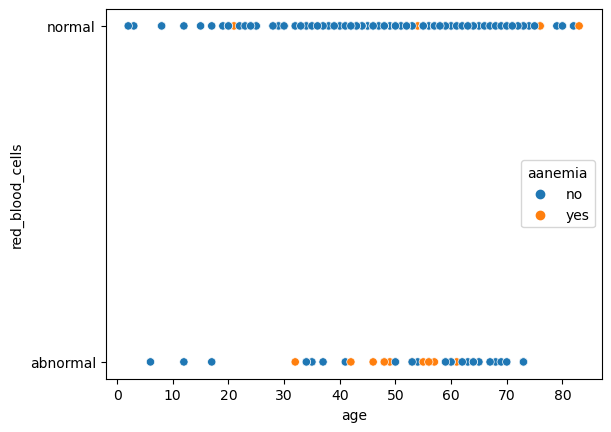

In [2266]:
sns.scatterplot(data=df,x=df['age'],y=df['red_blood_cells'],hue=df['aanemia'])

aanemia observed between ages of 30-60 with abnormal red blood cells .normal red blood cells are also seen with aanemia at different stages of ages.

<Axes: xlabel='age', ylabel='sugar'>

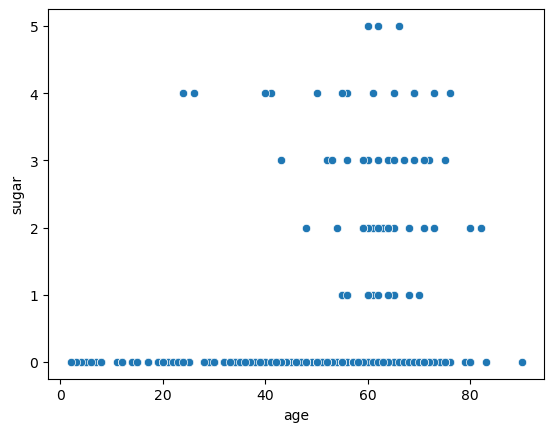

In [2267]:
sns.scatterplot(data=df,x=df['age'],y=df['sugar'])

<Axes: xlabel='age', ylabel='haemoglobin'>

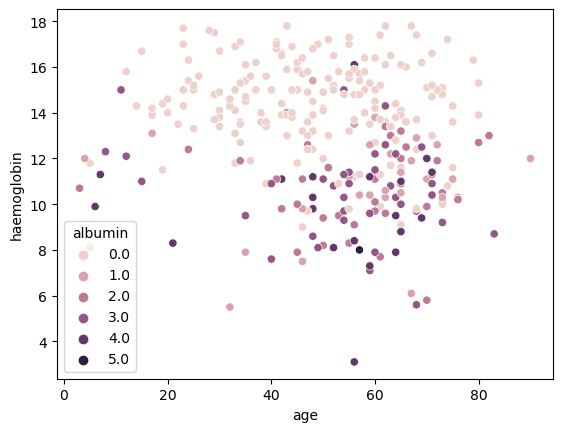

In [2268]:
sns.scatterplot(data=df,x=df['age'],y=df['haemoglobin'],hue=df['albumin'])

Low albumin levels (hypoalbuminemia) can be caused by liver disease, kidney disease, malnutrition, chronic inflammation (e.g., from infections or autoimmune diseases), and certain cancers.
Here albumin level is high in ages of people 40-80

<Axes: xlabel='age', ylabel='blood_glucose_random'>

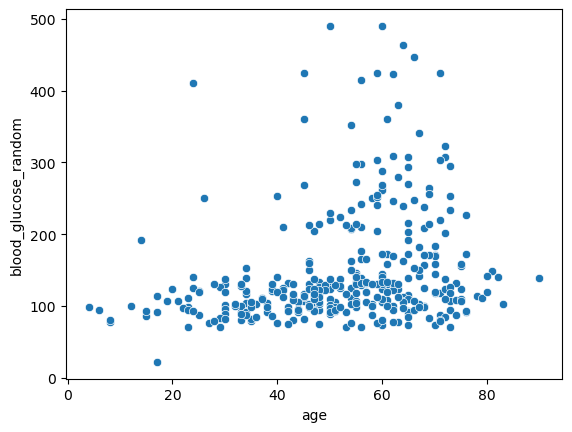

In [2269]:
sns.scatterplot(data=df,x=df['age'],y=df['blood_glucose_random'])

High blood glucose is observed between 40-80 age of people

<Axes: >

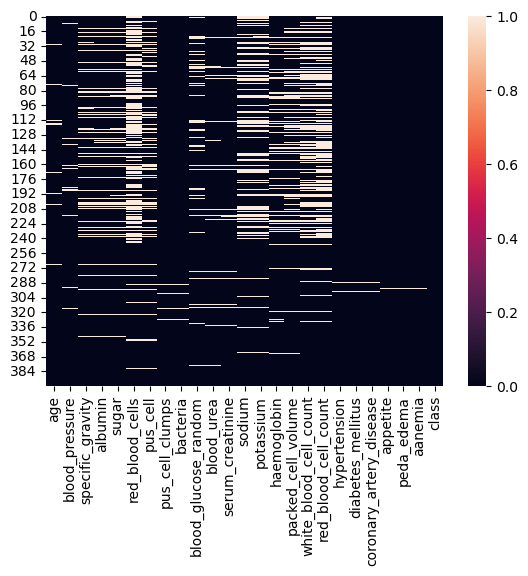

In [2270]:
sns.heatmap(df.isna())

In [2271]:
#Data preparation

In [2272]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2273]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [2274]:
cols=['age','blood_pressure','sugar','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium',
      'haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']   #outliers exists here

In [2275]:
for col in cols:                                 #filling with median for outliers column
    df[col]=df[col].fillna(df[col].median())

In [2276]:
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [2277]:
for col in cat_cols:                               #categorical columns null values filled with mode
    df[col]=df[col].fillna(df[col].mode()[0])

In [2278]:
df.isna().sum()

age                         0
blood_pressure              0
specific_gravity           47
albumin                    46
sugar                       0
red_blood_cells             0
pus_cell                    0
pus_cell_clumps             0
bacteria                    0
blood_glucose_random        0
blood_urea                  0
serum_creatinine            0
sodium                      0
potassium                   0
haemoglobin                 0
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
hypertension                0
diabetes_mellitus           0
coronary_artery_disease     0
appetite                    0
peda_edema                  0
aanemia                     0
class                       0
dtype: int64

In [2279]:
df['specific_gravity']=df['specific_gravity'].fillna(df['specific_gravity'].mean())     #rest of the columns filled with mean
df['albumin']=df['albumin'].fillna(df['albumin'].mean())

In [2280]:
cols

['age',
 'blood_pressure',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [2281]:
for col in cols:                                                                        #iqr method to get filtered data free from outliers
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    # iqr = (q3.astype(np.float32) - q1.astype(np.float32)).astype(np.bool)
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    mask = (df[col] >= lower_tail) & (df[col] <= upper_tail)
    # Apply mask to filter DataFrame
    df_filtered = df[mask]
    outlier_data=  (df[col] <= lower_tail) | (df[col] >= upper_tail)
    df_outlier = df[outlier_data]
    print(df_filtered[col].shape)
    print(df_outlier[col].shape)
    
    

(390,)
(10,)
(364,)
(36,)
(339,)
(400,)
(347,)
(53,)
(359,)
(41,)
(347,)
(53,)
(382,)
(36,)
(386,)
(14,)
(398,)
(2,)
(394,)
(8,)
(383,)
(17,)
(325,)
(75,)


In [2282]:
df_filtered.shape 

(325, 25)

In [2283]:
df_filtered.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [2284]:
df_filtered.dtypes

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [2285]:
df_floats = df_filtered.select_dtypes(include=['float64', 'float32'])
df_cat=df_filtered.select_dtypes(include=['object'])

In [2286]:
from scipy.stats import shapiro                                     #applying shapiro test to see whether data is normally distributed
for col in df_floats.columns:
    stat, p = shapiro(df_floats[col])
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat}, p-value={p}')

Shapiro-Wilk Test for age: Statistics=0.9543009400367737, p-value=1.6000207381239306e-08
Shapiro-Wilk Test for blood_pressure: Statistics=0.8591299057006836, p-value=1.3864481449608684e-16
Shapiro-Wilk Test for specific_gravity: Statistics=0.9063891172409058, p-value=2.6033596936189674e-13
Shapiro-Wilk Test for albumin: Statistics=0.7673243880271912, p-value=3.793536319183065e-21
Shapiro-Wilk Test for sugar: Statistics=0.4141594171524048, p-value=4.093005501879559e-31
Shapiro-Wilk Test for blood_glucose_random: Statistics=0.7201502919197083, p-value=5.61541673921694e-23
Shapiro-Wilk Test for blood_urea: Statistics=0.6929446458816528, p-value=6.2973101567283356e-24
Shapiro-Wilk Test for serum_creatinine: Statistics=0.40768033266067505, p-value=3.0271495091584663e-31
Shapiro-Wilk Test for sodium: Statistics=0.8727949857711792, p-value=9.917219506339774e-16
Shapiro-Wilk Test for potassium: Statistics=0.20019018650054932, p-value=6.19205080236953e-35
Shapiro-Wilk Test for haemoglobin: Stat

In [2287]:
#data is normally distributed

In [2289]:
df_cat['high_blood_glucose'] = df_floats['blood_glucose_random'] > 140   #feature engineering starts here
df_cat['anemia'] = df_floats['haemoglobin'] < 12

In [2290]:

#applying one hot encoding technique for categorical columns
# Assuming df_cat is your DataFrame containing only categorical columns
onehotEnc = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform the categorical data
df_cat_encoded = onehotEnc.fit_transform(df_cat)

# Get the feature names for the one-hot encoded columns
encoded_columns = onehotEnc.get_feature_names_out(df_cat.columns)

# Create a DataFrame with the encoded data and the appropriate column names
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoded_columns, dtype=int)

# Verify the result
print(df_cat_encoded.head())


   red_blood_cells_abnormal  red_blood_cells_normal  pus_cell_abnormal  \
0                         0                       1                  0   
1                         0                       1                  0   
2                         0                       1                  0   
3                         0                       1                  1   
4                         0                       1                  0   

   pus_cell_normal  pus_cell_clumps_notpresent  pus_cell_clumps_present  \
0                1                           1                        0   
1                1                           1                        0   
2                1                           1                        0   
3                0                           0                        1   
4                1                           1                        0   

   bacteria_notpresent  bacteria_present  hypertension_no  hypertension_yes  \
0                    1   

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2291]:
df_cat_encoded

,red_blood_cells_abnormal,red_blood_cells_normal,pus_cell_abnormal,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,bacteria_notpresent,bacteria_present,hypertension_no,hypertension_yes,diabetes_mellitus_\tno,diabetes_mellitus_\tyes,diabetes_mellitus_ yes,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_\tno,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,class_ckd,class_ckd\t,class_notckd,high_blood_glucose_False,high_blood_glucose_True,anemia_False,anemia_True
0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
2,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1
3,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
321,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
322,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
323,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0


In [ ]:
#feature engineering

In [2292]:
df_floats['urea_creatinine_sum'] = df_floats['blood_urea'] + df_floats['serum_creatinine']
df_floats['sodium_potassium_ratio'] = df_floats['sodium'] / df_floats['potassium']

In [2293]:
df_floats['bp_age_interaction'] = df_floats['blood_pressure'] * df_floats['age']
df_floats['glucose_urea_interaction'] = df_floats['blood_glucose_random'] * df_floats['blood_urea']

In [2294]:
df_floats

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,urea_creatinine_sum,sodium_potassium_ratio,bp_age_interaction,glucose_urea_interaction
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,37.2,31.363636,3840.0,4356.0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,18.8,31.363636,350.0,2178.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,54.8,31.363636,4960.0,22419.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,59.8,44.400000,3360.0,6552.0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,27.4,31.363636,4080.0,2756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,43.0,60.0,1.025,0.0,0.0,117.0,45.0,0.7,141.0,4.4,13.0,54.0,7400.0,5.4,45.7,32.045455,2580.0,5265.0
394,50.0,80.0,1.020,0.0,0.0,137.0,46.0,0.8,139.0,5.0,14.1,45.0,9500.0,4.6,46.8,27.800000,4000.0,6302.0
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,49.5,30.612245,4400.0,6860.0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,26.6,31.136364,960.0,2600.0


In [2295]:
scaler=StandardScaler()                                             #applying standard scaler as data is normally distributed
numeric=scaler.fit_transform(df_floats)

In [2296]:
df_numeric=pd.DataFrame(numeric,columns=df_floats.columns)

In [2297]:
df_combined=pd.concat([df_numeric,df_cat_encoded],axis=1)

In [2298]:
df_combined=df_combined.dropna()

In [2299]:
df_combined

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,urea_creatinine_sum,sodium_potassium_ratio,bp_age_interaction,glucose_urea_interaction,red_blood_cells_abnormal,red_blood_cells_normal,pus_cell_abnormal,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,bacteria_notpresent,bacteria_present,hypertension_no,hypertension_yes,diabetes_mellitus_\tno,diabetes_mellitus_\tyes,diabetes_mellitus_ yes,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_\tno,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,class_ckd,class_ckd\t,class_notckd,high_blood_glucose_False,high_blood_glucose_True,anemia_False,anemia_True
0,-0.177690,0.282907,0.484712,0.052662,-0.364461,-0.321405,-0.342902,-0.300062,-0.049511,-0.038970,1.075711,0.577673,-0.202273,0.830809,-0.352221,-0.153368,-0.059363,-0.392374,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
1,-2.524284,-1.978027,0.484712,2.575031,-0.364461,-0.321405,-0.794781,-0.397986,-0.049511,-0.038970,-0.623720,-0.292182,-0.990087,-0.007090,-0.787624,-0.153368,-2.304512,-0.652673,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
2,0.623587,0.282907,-1.422239,0.893452,2.524558,3.560694,0.083872,-0.153176,-0.049511,-0.038970,-1.328362,-1.307014,-0.333575,-0.007090,0.064251,-0.153368,0.661144,1.766382,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1
3,-0.177690,-0.470738,-2.375714,2.575031,-0.364461,-0.372824,0.159185,0.336444,-4.721080,-0.986374,-0.665169,-1.162038,-0.683715,-1.892362,0.182567,2.574970,-0.368151,-0.129924,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1
4,-0.005988,0.282907,-1.422239,0.893452,-0.364461,-0.514225,-0.593946,-0.251100,-0.049511,-0.038970,-0.499371,-0.727110,-0.421110,-0.426039,-0.584121,-0.153368,0.095032,-0.583594,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-0.463860,-1.224383,1.438187,-0.788128,-0.364461,-0.372824,-0.116963,-0.422467,0.469553,-0.038970,0.080922,2.027433,-0.377343,1.249758,-0.151084,-0.010673,-0.869932,-0.283737,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
321,-0.063222,0.282907,0.484712,-0.788128,-0.364461,-0.115731,-0.091859,-0.397986,0.123510,0.260210,0.536867,0.722649,0.541774,-0.426039,-0.125055,-0.899190,0.043567,-0.159803,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
322,0.222949,0.282907,0.484712,-0.788128,-0.364461,-0.077167,-0.016546,-0.471429,2.026742,0.210347,1.200059,1.012601,-0.683715,0.202385,-0.061164,-0.310625,0.300891,-0.093115,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
323,-2.238114,0.282907,0.484712,-0.788128,-0.364461,-0.591353,-0.593946,-0.446948,-0.222532,-0.038970,1.241509,1.302553,-0.727483,1.249758,-0.603051,-0.200933,-1.912093,-0.602238,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0


In [2300]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          325 non-null    float64
 1   blood_pressure               325 non-null    float64
 2   specific_gravity             325 non-null    float64
 3   albumin                      325 non-null    float64
 4   sugar                        325 non-null    float64
 5   blood_glucose_random         325 non-null    float64
 6   blood_urea                   325 non-null    float64
 7   serum_creatinine             325 non-null    float64
 8   sodium                       325 non-null    float64
 9   potassium                    325 non-null    float64
 10  haemoglobin                  325 non-null    float64
 11  packed_cell_volume           325 non-null    float64
 12  white_blood_cell_count       325 non-null    float64
 13  red_blood_cell_count

In [2301]:
df_combined

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,urea_creatinine_sum,sodium_potassium_ratio,bp_age_interaction,glucose_urea_interaction,red_blood_cells_abnormal,red_blood_cells_normal,pus_cell_abnormal,pus_cell_normal,pus_cell_clumps_notpresent,pus_cell_clumps_present,bacteria_notpresent,bacteria_present,hypertension_no,hypertension_yes,diabetes_mellitus_\tno,diabetes_mellitus_\tyes,diabetes_mellitus_ yes,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_\tno,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,class_ckd,class_ckd\t,class_notckd,high_blood_glucose_False,high_blood_glucose_True,anemia_False,anemia_True
0,-0.177690,0.282907,0.484712,0.052662,-0.364461,-0.321405,-0.342902,-0.300062,-0.049511,-0.038970,1.075711,0.577673,-0.202273,0.830809,-0.352221,-0.153368,-0.059363,-0.392374,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
1,-2.524284,-1.978027,0.484712,2.575031,-0.364461,-0.321405,-0.794781,-0.397986,-0.049511,-0.038970,-0.623720,-0.292182,-0.990087,-0.007090,-0.787624,-0.153368,-2.304512,-0.652673,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
2,0.623587,0.282907,-1.422239,0.893452,2.524558,3.560694,0.083872,-0.153176,-0.049511,-0.038970,-1.328362,-1.307014,-0.333575,-0.007090,0.064251,-0.153368,0.661144,1.766382,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1
3,-0.177690,-0.470738,-2.375714,2.575031,-0.364461,-0.372824,0.159185,0.336444,-4.721080,-0.986374,-0.665169,-1.162038,-0.683715,-1.892362,0.182567,2.574970,-0.368151,-0.129924,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1
4,-0.005988,0.282907,-1.422239,0.893452,-0.364461,-0.514225,-0.593946,-0.251100,-0.049511,-0.038970,-0.499371,-0.727110,-0.421110,-0.426039,-0.584121,-0.153368,0.095032,-0.583594,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-0.463860,-1.224383,1.438187,-0.788128,-0.364461,-0.372824,-0.116963,-0.422467,0.469553,-0.038970,0.080922,2.027433,-0.377343,1.249758,-0.151084,-0.010673,-0.869932,-0.283737,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
321,-0.063222,0.282907,0.484712,-0.788128,-0.364461,-0.115731,-0.091859,-0.397986,0.123510,0.260210,0.536867,0.722649,0.541774,-0.426039,-0.125055,-0.899190,0.043567,-0.159803,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
322,0.222949,0.282907,0.484712,-0.788128,-0.364461,-0.077167,-0.016546,-0.471429,2.026742,0.210347,1.200059,1.012601,-0.683715,0.202385,-0.061164,-0.310625,0.300891,-0.093115,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0
323,-2.238114,0.282907,0.484712,-0.788128,-0.364461,-0.591353,-0.593946,-0.446948,-0.222532,-0.038970,1.241509,1.302553,-0.727483,1.249758,-0.603051,-0.200933,-1.912093,-0.602238,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0


In [2302]:
df_combined.shape

(325, 49)

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\madhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


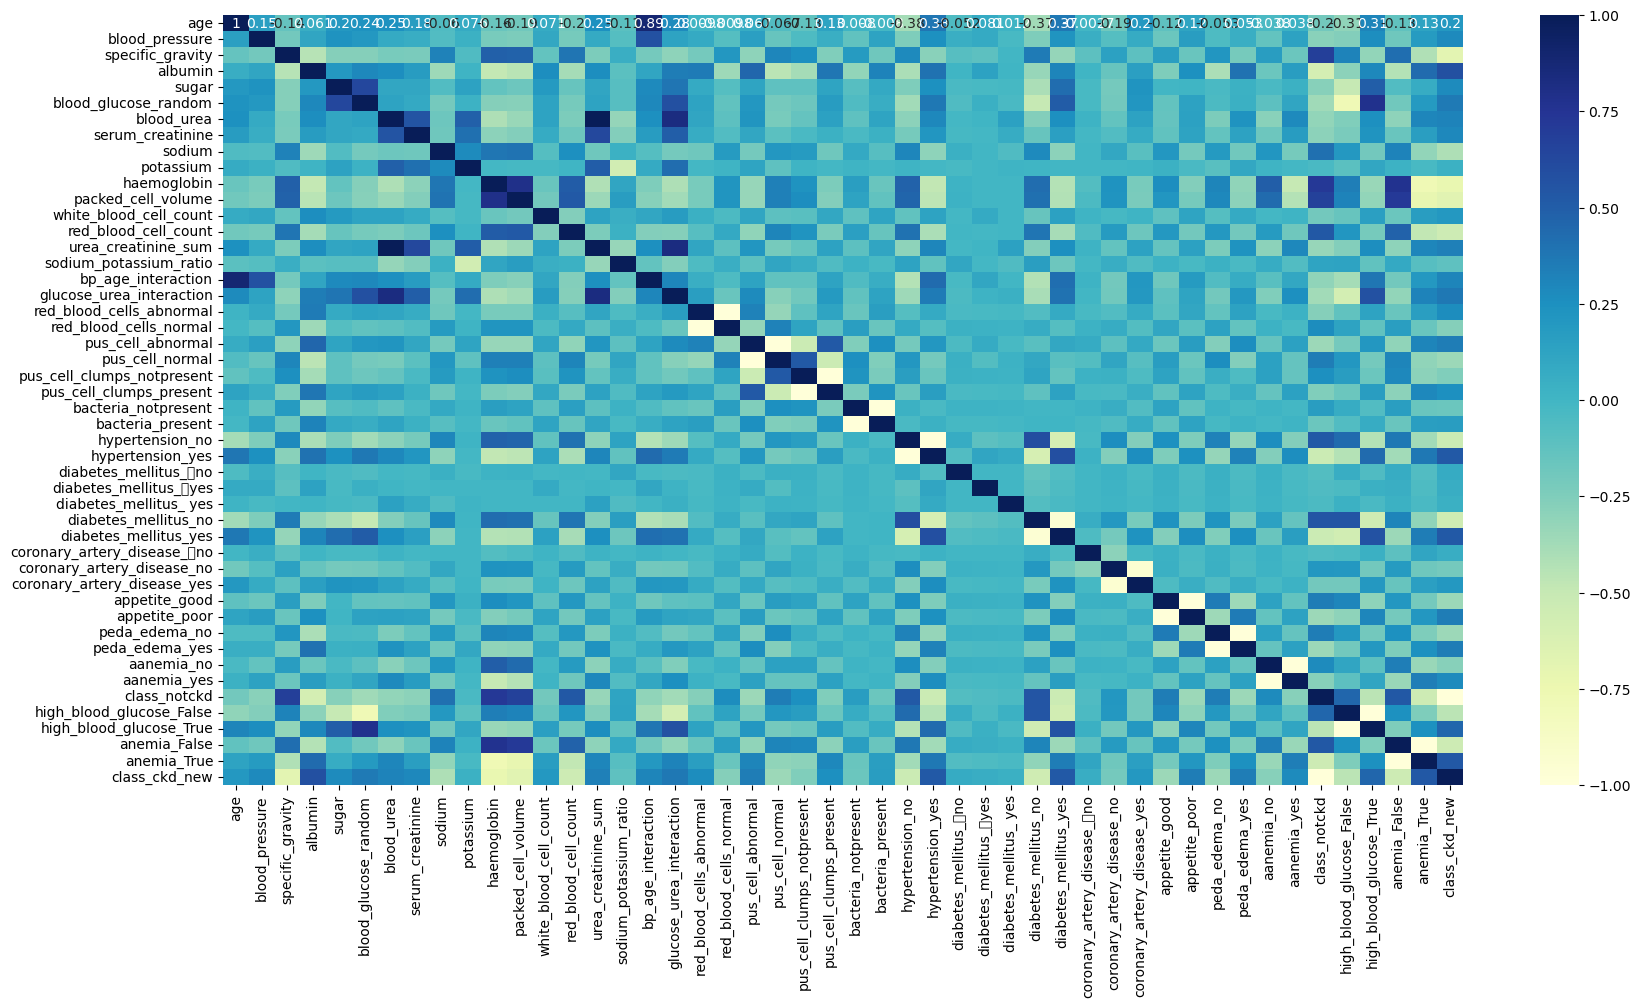

In [2350]:
plt.figure(figsize=(20,10))                 #heatmap been plotted
sns.heatmap(df_combined.corr(),annot=True,cmap='YlGnBu')

In [2303]:
df_combined['class_ckd_new']=df_combined['class_ckd'] | df_combined['class_ckd\t']

In [2304]:
df_combined.drop(['class_ckd','class_ckd\t'],axis=1,inplace=True)

In [2305]:
df_combined['class_notckd'].value_counts()  #121

class_notckd
0    204
1    121
Name: count, dtype: int64

In [2306]:
df_combined['class_ckd_new'].value_counts() #204

class_ckd_new
1    204
0    121
Name: count, dtype: int64

In [2307]:
#Treating imbalanced data

In [2308]:
X=df_combined.drop(columns=['class_notckd','class_ckd_new'],axis=1)
y=df_combined['class_ckd_new']
smt=SMOTE()
X_resampled, y_resampled =smt.fit_resample(X,y)

In [2309]:
len(X_resampled)

408

In [2310]:
len(y_resampled)

408

In [2311]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)

In [2312]:
model=XGBClassifier()

In [2313]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [2314]:
y_pred=model.predict(X_test)

In [2315]:
predictions = [round(value) for value in y_pred]

In [2316]:
len(predictions)

82

In [2317]:
len(y_test)

82

In [2318]:
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 100.00%


In [2319]:
y_train_pred=model.predict(X_train)

In [2320]:
train_accuracy=accuracy_score(y_train,y_train_pred)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

Train Accuracy: 100.00%


In [2321]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        38

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [2322]:
confusion_matrix(y_test, predictions)

array([[44,  0],
       [ 0, 38]], dtype=int64)

In [2323]:
#RandomForest

In [2324]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)

In [2325]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [2326]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [2327]:
y_pred=model.predict(X_test)

In [2328]:
predictions = [round(value) for value in y_pred]

In [2329]:
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 100.00%


In [2330]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

Train Accuracy: 100.00%


In [2331]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        38

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [2332]:
confusion_matrix(y_test, predictions)

array([[44,  0],
       [ 0, 38]], dtype=int64)

In [2333]:
#SVM

In [2334]:
from sklearn.svm import SVC

In [2335]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=1)

In [2336]:
model = SVC(kernel='linear', C=1.0, random_state=42)

In [2337]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [2338]:
y_pred = model.predict(X_test)

In [2339]:
predictions = [round(value) for value in y_pred]

In [2340]:
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 100.00%


In [2341]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))

Train Accuracy: 100.00%


In [2342]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        38

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [2343]:
confusion_matrix(y_test, predictions)

array([[44,  0],
       [ 0, 38]], dtype=int64)

In [ ]:
#applied XGBoost,Random Forest and SVM algorithms and all three gave 100% results and were able to classify people suffering from ckd successfully to those who are not.